# Test the Qlearner attacker in the little environment

-   initialisation of the environment
-   initialisation of the Qlearner agent

In [1]:
from cyberbattle.agents.battle_environment import CyberBattleEnv
from cyberbattle.agents.attacker.attacker_interface import AttackerGoal
from cyberbattle.env.samples.little_network import get_little_environment_network, Dev, DSI

num_client = 5
net = get_little_environment_network(num_client)
profiles = {
    DSI(num_client): 1,
    Dev(num_client): num_client - 1
}
env = CyberBattleEnv(net, profiles, attacker_goal=AttackerGoal(nb_flag=2))

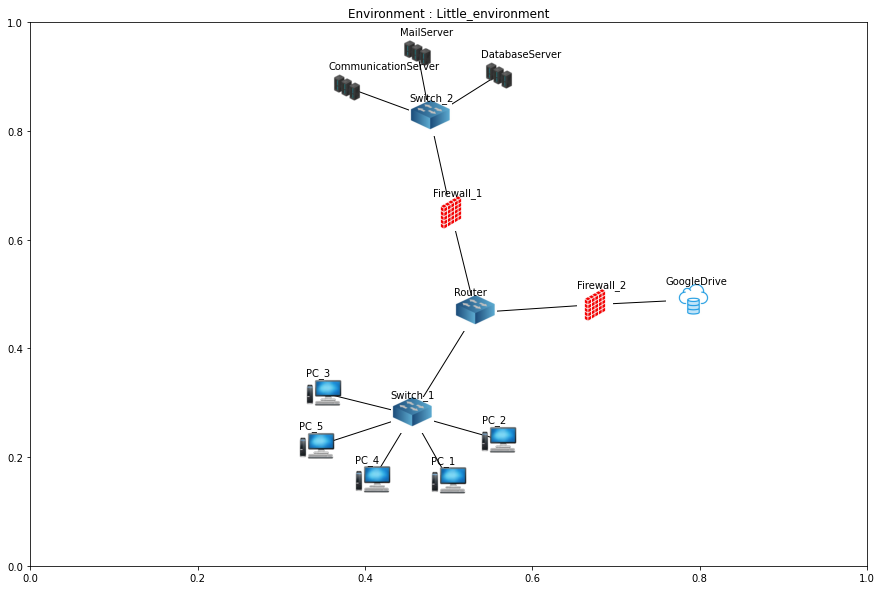

In [2]:
env.display_network()

In [3]:
env.attacker_description()

The attacker can performed the following attacks classified by their index :
{0: 'Process Discovery', 1: 'Browser Session Hijacking', 2: 'Network Service Scanning', 3: 'GUI Input Capture', 4: 'Password Guessing'}

These attacks can be performed and allow the attacker to get outcomes as follows :
{'PC_1': {}, 'PC_2': {'Process Discovery': {'data sources triggered': 'Process', 'phase name': 'discovery', 'Type': 'Local'}}, 'PC_3': {}, 'PC_4': {}, 'PC_5': {'GUI Input Capture': {'data sources triggered': 'Process', 'phase name': 'credential-access', 'Type': 'Remote'}}, 'Switch_1': {}, 'Switch_2': {}, 'Router': {}, 'DatabaseServer': {'Browser Session Hijacking': {'data sources triggered': 'Logon Session', 'phase name': 'collection', 'Type': 'Local'}}, 'MailServer': {'Network Service Scanning': {'data sources triggered': 'Cloud Service', 'phase name': 'discovery', 'Type': 'Local'}}, 'CommunicationServer': {}, 'GoogleDrive': {'Password Guessing': {'data sources triggered': 'User Account', 'pha

In [4]:
from cyberbattle.agents.attacker.baseline.qlearning import Qlearner
from cyberbattle.agents.simulation import Simulation
from cyberbattle.utils.functions import exponential_espilon_decrease

decrease_function = exponential_espilon_decrease(0.01, 5000)

qleaner_agent = Qlearner(bounds=env.get_attacker_bounds(), features=['All'], gamma=0.015, hash_size=10000, learning_rate=0.01)

simulation = Simulation(env)
simulation.compile(training_method='epsilon greedy search', simulation_type='Agent vs Nothing')

Training the agent Qlearner
with parameters : n_states=10000, n_actions=34, learning_rate=0.01, gamma=0.015.
against nothing.
Epsilon greedy search parameters : max_iteration=600, epochs=1000 and epsilon=0.9.

Epoch : 1/1000, epsilon = 0.9
600/600 [==============================] - 0s 281us/iteration - cumulate rewards: 1315.0 - succesful actions count: 7 - failed actions count: 139 - infected machines count: 3 - model loss: 86.30817610062893               

Epoch ended at 150 iterations - Exploit deflected to explore count : 1 - Submarine action count : 4. 

###################

Epoch : 2/1000, epsilon = 0.8738692814382261
600/600 [==============================] - 0s 433us/iteration - cumulate rewards: -8977.0 - succesful actions count: 7 - failed actions count: 356 - infected machines count: 3 - model loss: 60.63553521464647                

Epoch ended at 374 iterations - Exploit deflected to explore count : 5 - Submarine action count : 11. 

###################

Epoch : 3/1000, ep

MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 2/11 at Epoch_3.gif


MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 3/11 at Epoch_107.gif


MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 4/11 at Epoch_125.gif


MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 5/11 at Epoch_158.gif


MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 6/11 at Epoch_165.gif


MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 7/11 at Epoch_185.gif


MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 8/11 at Epoch_188.gif


MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 9/11 at Epoch_192.gif


MovieWriter PillowWriter unavailable; using Pillow instead.
MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 10/11 at Epoch_219.gif


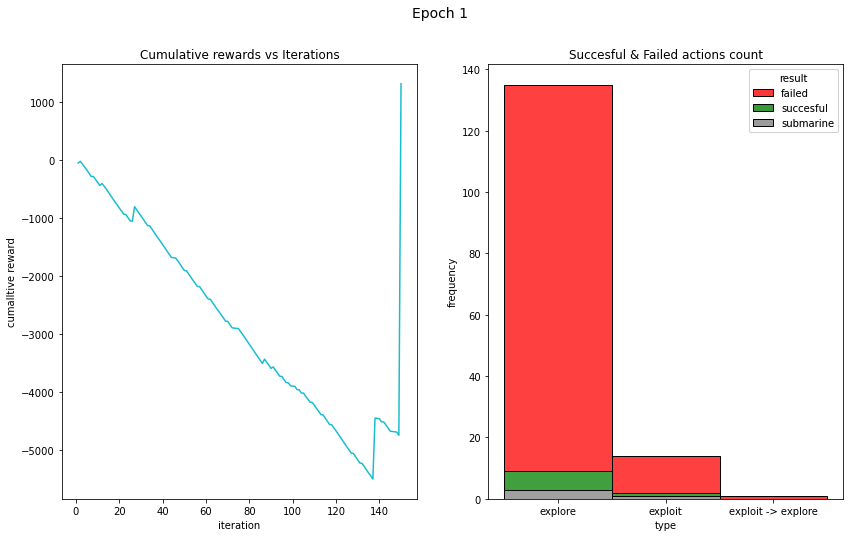

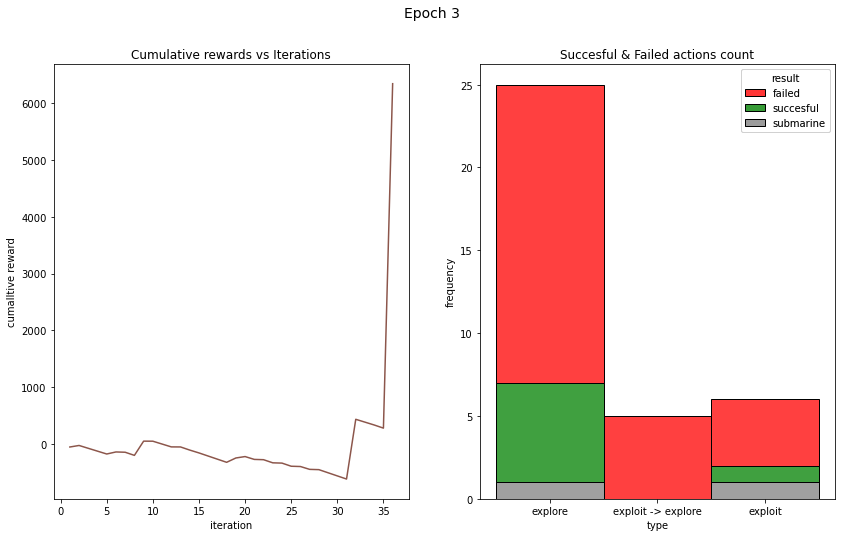

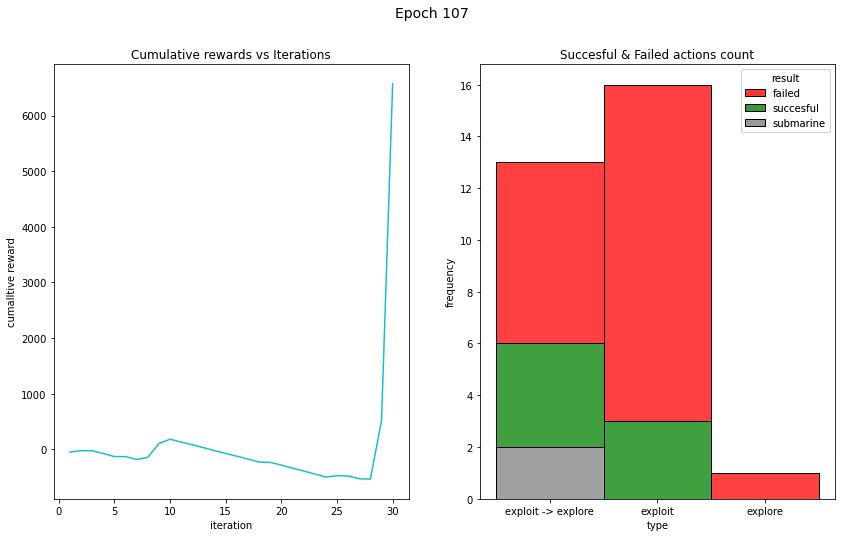

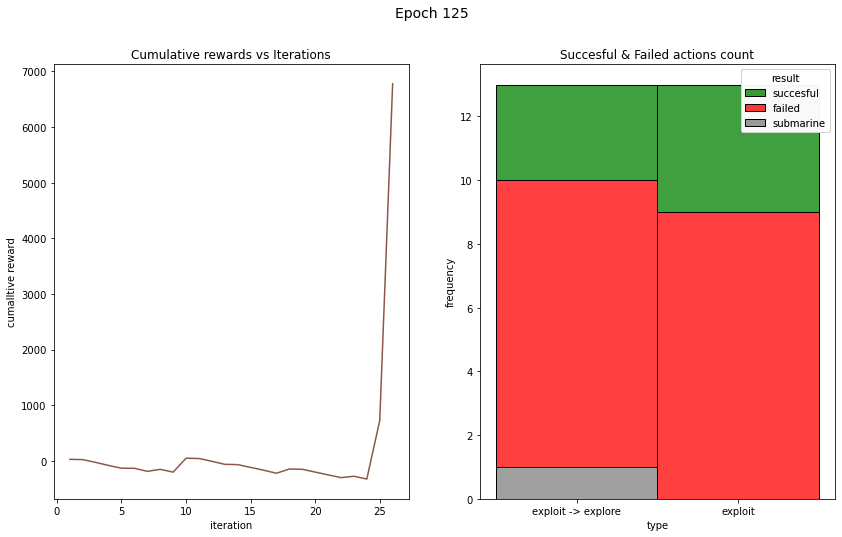

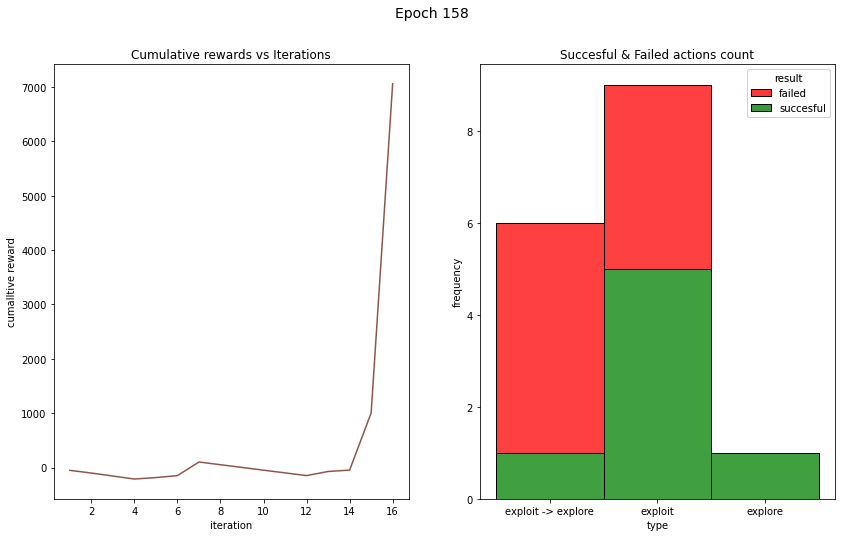

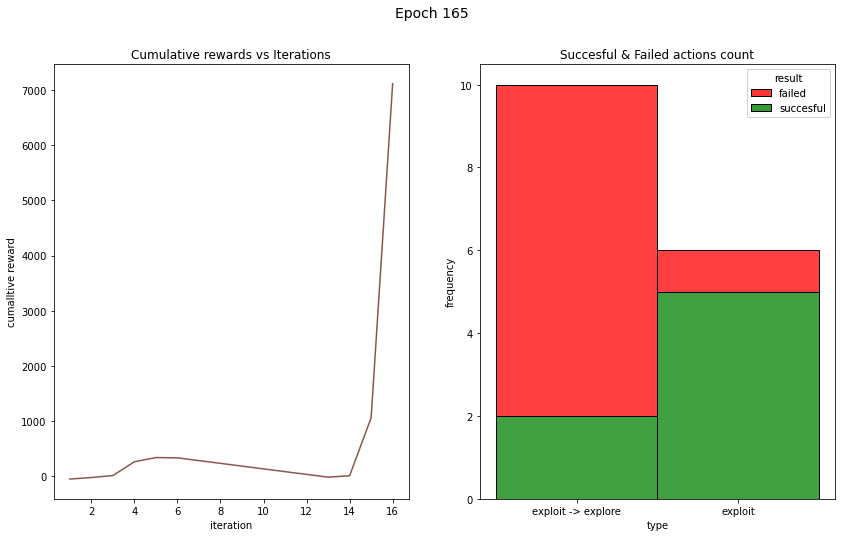

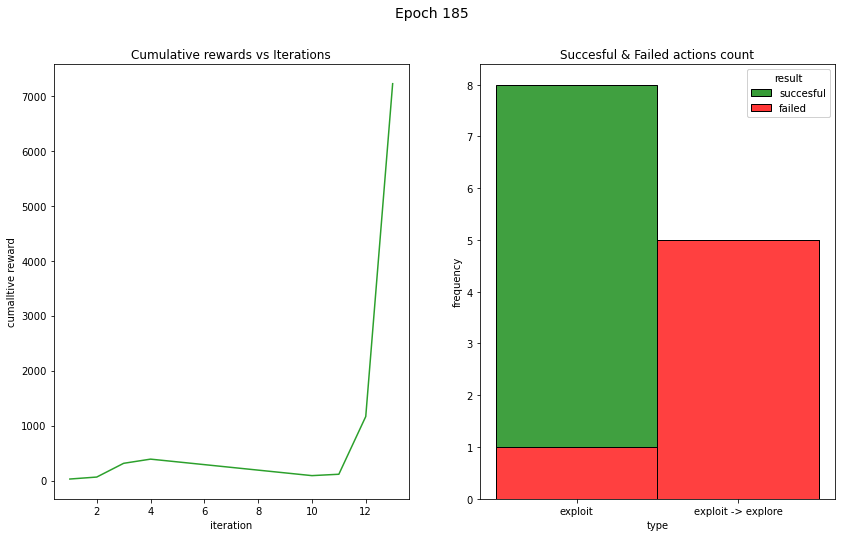

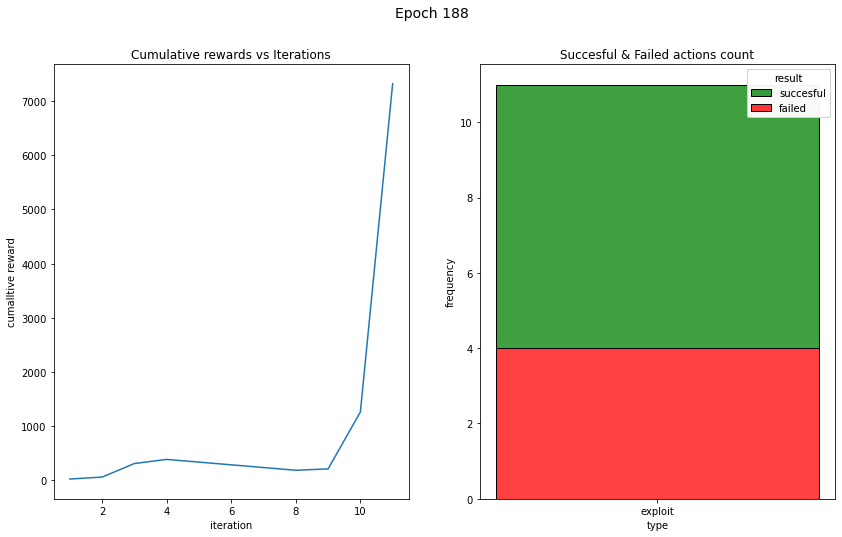

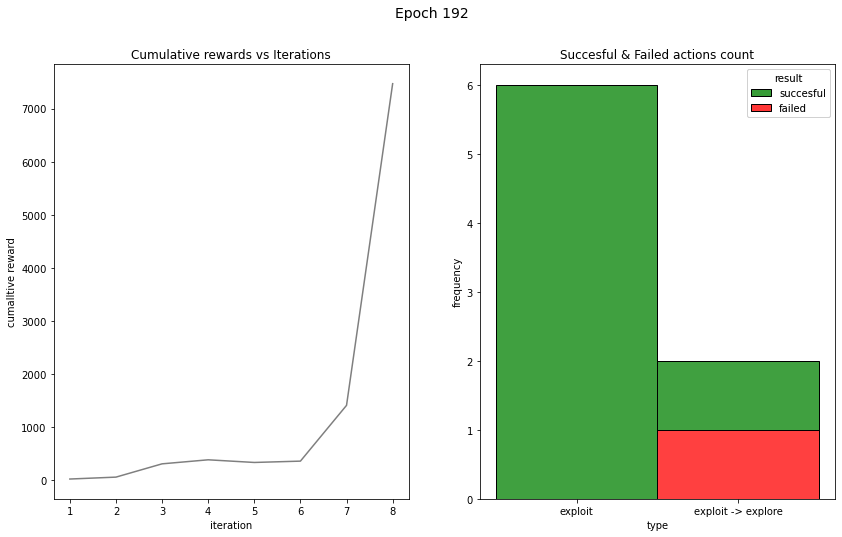

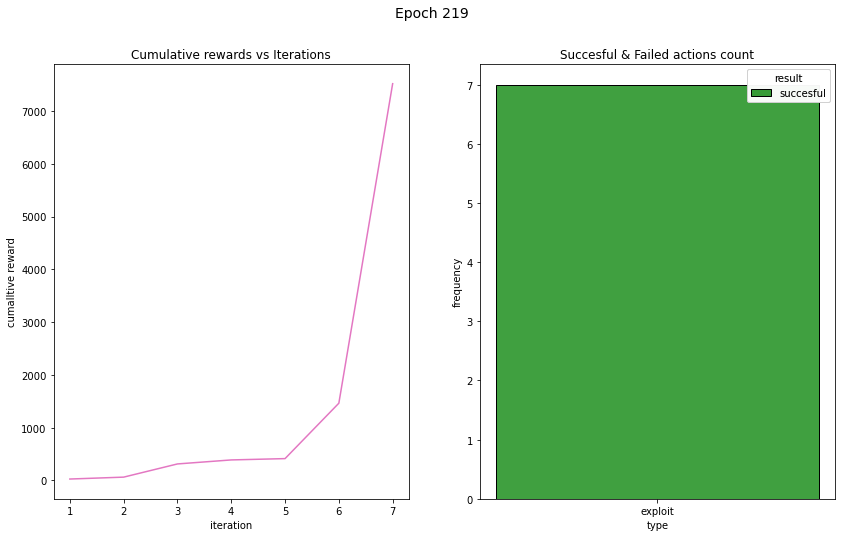

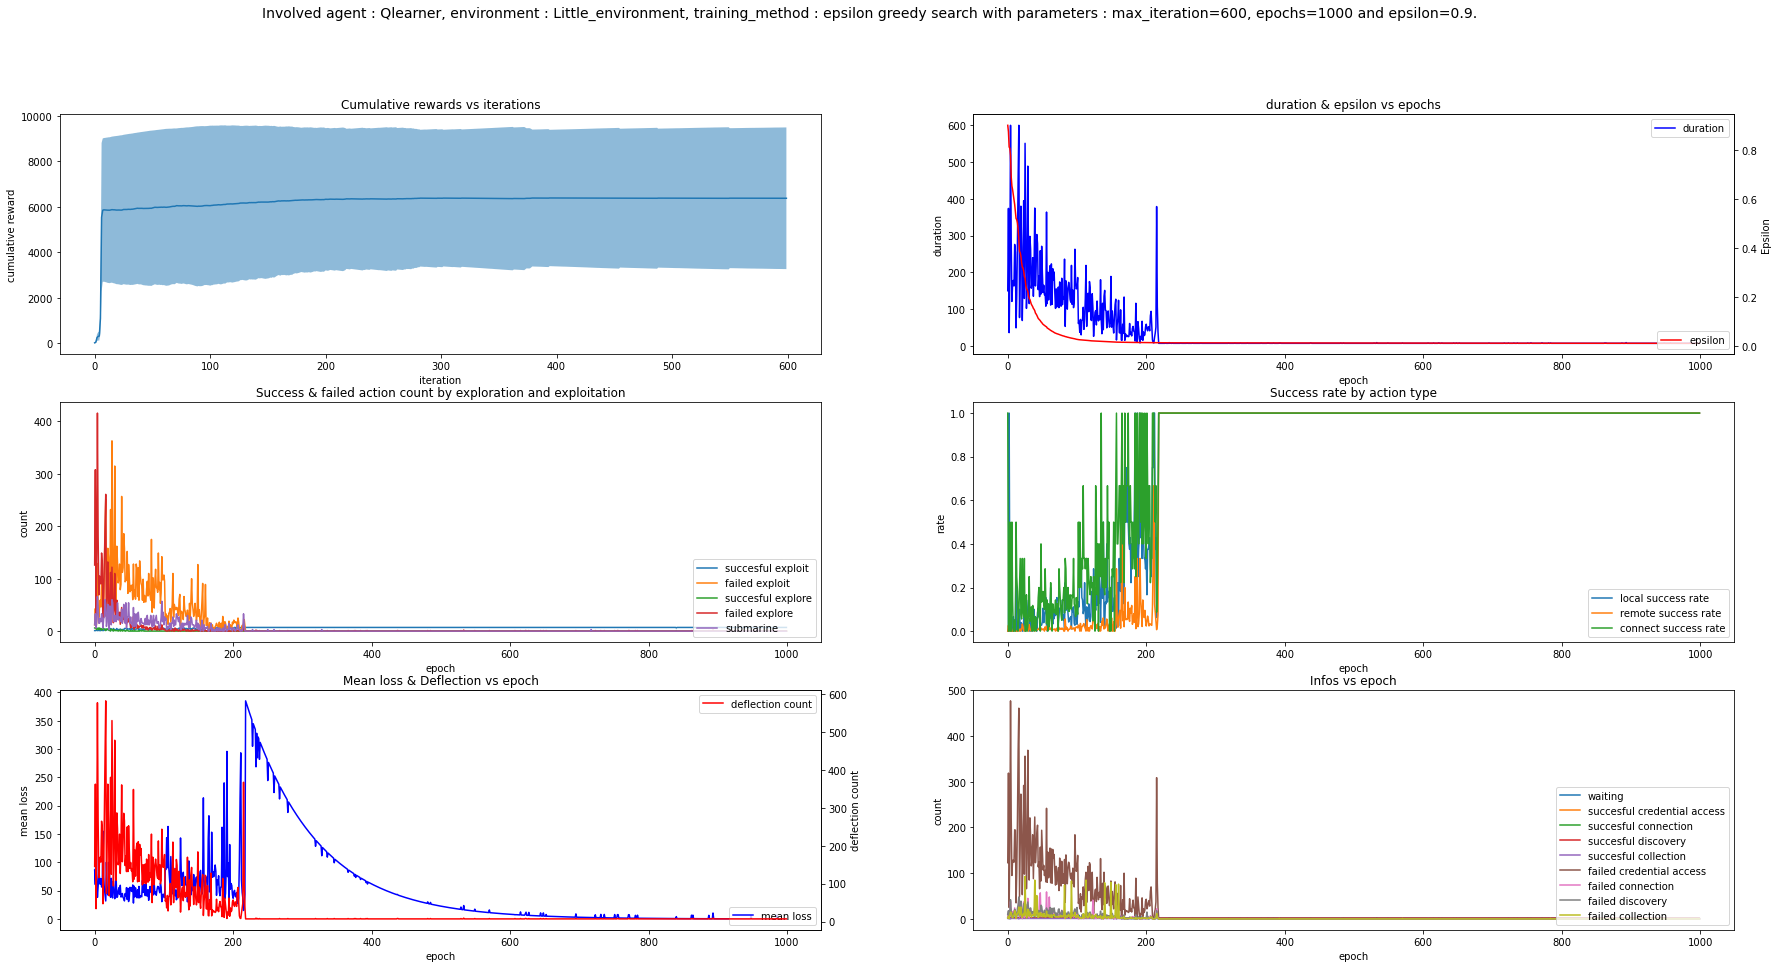

Details of a sample attack :



Number of exploit deflected to explore : 0.


In [5]:
simulation.run(
    max_iteration=600,
    epochs=1000,
    attacker=qleaner_agent,
    verbose=1,
    decrease_function=decrease_function,
    sample_attack=True,
    gifsave='./render/attacker/QleanerTrain/Alone'
)